In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


# choose a style option
plt.style.use('bmh')
from bs4 import BeautifulSoup

In [35]:
df = pd.read_csv(r'C:\Users\HP\Data_Science_Course\01 PYTHON PROGRAMMING\Datasets\Imdb_EDA.csv')
df.head(5)

,Unnamed: 0,movie_names,release_year,movie_runtime,movie_genre,movie_rating,movie_ranking,Movie_Director,Movie_Stars,metascore,votes,Gross
0,0,The Godfather,1972,175,"Crime, Drama",9.2,5,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane...",100.0,1801483,134.97
1,1,Spider-Man: No Way Home,2021,148,"Action, Adventure, Fantasy",8.3,6,Jon Watts,"Tom Holland, Zendaya, Benedict Cumberbatch, ...",71.0,669724,804.75
2,2,Once Upon a Time in... Hollywood,2019,161,"Comedy, Drama",7.6,7,Quentin Tarantino,"Leonardo DiCaprio, Brad Pitt, Margot Robbie,...",83.0,697745,142.50
3,3,Jurassic Park,1993,127,"Action, Adventure, Sci-Fi",8.2,9,Steven Spielberg,"Sam Neill, Laura Dern, Jeff Goldblum, Richa...",68.0,962255,402.45
4,4,Dune: Part One,2021,155,"Action, Adventure, Drama",8.0,10,Denis Villeneuve,"Timothée Chalamet, Rebecca Ferguson, Zendaya...",74.0,586654,108.33


In [36]:
df['Gross']=df.Gross *78.35

In [37]:
df['Gross_(in_lakh)'] = df['Gross']

In [38]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [39]:
df.head(3)

,movie_names,release_year,movie_runtime,movie_genre,movie_rating,movie_ranking,Movie_Director,Movie_Stars,metascore,votes,Gross,Gross_(in_lakh)
0,The Godfather,1972,175,"Crime, Drama",9.2,5,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane...",100.0,1801483,10574.8995,10574.8995
1,Spider-Man: No Way Home,2021,148,"Action, Adventure, Fantasy",8.3,6,Jon Watts,"Tom Holland, Zendaya, Benedict Cumberbatch, ...",71.0,669724,63052.1625,63052.1625
2,Once Upon a Time in... Hollywood,2019,161,"Comedy, Drama",7.6,7,Quentin Tarantino,"Leonardo DiCaprio, Brad Pitt, Margot Robbie,...",83.0,697745,11164.8750,11164.8750


In [40]:
df.drop(['Gross'],axis=1,inplace=True)

In [41]:
df.shape

(552, 11)

In [42]:
df.isnull().sum()

movie_names        0
release_year       0
movie_runtime      0
movie_genre        0
movie_rating       0
movie_ranking      0
Movie_Director     0
Movie_Stars        0
metascore          0
votes              0
Gross_(in_lakh)    0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_names      552 non-null    object 
 1   release_year     552 non-null    int64  
 2   movie_runtime    552 non-null    int64  
 3   movie_genre      552 non-null    object 
 4   movie_rating     552 non-null    float64
 5   movie_ranking    552 non-null    int64  
 6   Movie_Director   552 non-null    object 
 7   Movie_Stars      552 non-null    object 
 8   metascore        552 non-null    float64
 9   votes            552 non-null    int64  
 10  Gross_(in_lakh)  552 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 47.6+ KB


In [44]:
df.describe()

,release_year,movie_runtime,movie_rating,movie_ranking,metascore,votes,Gross_(in_lakh)
count,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02,552.000000
mean,1994.994565,125.942029,7.976268,311.307971,77.536232,4.734688e+05,7574.430894
std,18.924867,26.386838,0.313342,183.779486,11.888111,4.023215e+05,9960.202823
min,1927.000000,76.000000,7.600000,5.000000,30.000000,2.757500e+04,0.000000
25%,1985.000000,107.000000,7.700000,150.750000,70.000000,1.837205e+05,1069.477500
50%,2000.000000,122.000000,7.900000,308.500000,78.000000,3.525125e+05,4062.839250
75%,2009.000000,139.000000,8.200000,461.250000,86.000000,6.564462e+05,10194.510250
max,2021.000000,238.000000,9.300000,650.000000,100.000000,2.605995e+06,73387.311000


## what are the longest and shortest movies ?

In [45]:
df[df.movie_runtime ==df.movie_runtime.max()][['movie_names','movie_runtime']]

df[df.movie_runtime ==df.movie_runtime.min()][['movie_names','movie_runtime']]

,movie_names,movie_runtime
290,Gone with the Wind,238


,movie_names,movie_runtime
460,The Nightmare Before Christmas,76


In [46]:
df[df.movie_runtime >210]

,movie_names,release_year,movie_runtime,movie_genre,movie_rating,movie_ranking,Movie_Director,Movie_Stars,metascore,votes,Gross_(in_lakh)
110,Once Upon a Time in America,1984,229,"Crime, Drama",8.3,123,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGov...",75.0,345395,416.822
290,Gone with the Wind,1939,238,"Drama, Romance, War",8.2,323,"Victor Fleming, George Cukor, Sam Wood","Clark Gable, Vivien Leigh, Thomas Mitchell, ...",97.0,311710,15566.578
346,Lawrence of Arabia,1962,218,"Adventure, Biography, Drama",8.3,386,David Lean,"Peter O'Toole, Alec Guinness, Anthony Quinn,...",100.0,289583,3511.647
452,Ben-Hur,1959,212,"Adventure, Drama, History",8.1,513,William Wyler,"Charlton Heston, Jack Hawkins, Stephen Boyd,...",90.0,236908,5852.745


**"The Longest Movie From Given Dataset Is 'Gone With The Wind' With Runtime 238 Minutes,Thats About 3 Hour And Shortest Movie Is The Nightmare Before Christmas\tWith Runtime 76 Minutes"**

## low rated movies

In [47]:
df.nsmallest(2,'movie_rating')

,movie_names,release_year,movie_runtime,movie_genre,movie_rating,movie_ranking,Movie_Director,Movie_Stars,metascore,votes,Gross_(in_lakh)
2,Once Upon a Time in... Hollywood,2019,161,"Comedy, Drama",7.6,7,Quentin Tarantino,"Leonardo DiCaprio, Brad Pitt, Margot Robbie,...",83.0,697745,11164.875
15,Star Wars: Episode III - Revenge of the Sith,2005,140,"Action, Adventure, Fantasy",7.6,21,George Lucas,"Hayden Christensen, Natalie Portman, Ewan Mc...",68.0,774169,29793.371


**"Once Upon a Time in Hollywood and Star Wars: Episode III - Revenge of the Sith" are the low rated movies with 7.6 ratings**

## In which year there was the highest average voting ?

In [50]:
df.groupby(['release_year'])['votes'].mean().sort_values(ascending=False)

release_year
1994    936528.600000
2012    753069.538462
1966    747037.000000
2010    708644.500000
1999    690488.142857
            ...      
1970    101502.000000
1933     84957.000000
1946     83062.000000
1961     81451.000000
2020     53822.000000
Name: votes, Length: 80, dtype: float64

**1994,2021,1966,2010 was the year where there was highest average voting**

# 1.UNIVARIATE ANALYSIS

##  Distribution of release_year (distplot)

<AxesSubplot:xlabel='release_year', ylabel='Density'>

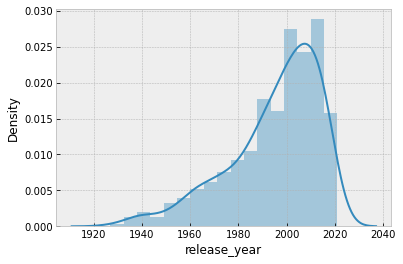

In [18]:
sns.distplot(df.release_year)

**Here we can see there has been drastic increase from the year of 2000,it appears that average and maximum number of movies are released from 2000 to 2019**

**But there is sudden fall due to worldwide CORONA outrage**

## Runtime Analysis (Boxplot )

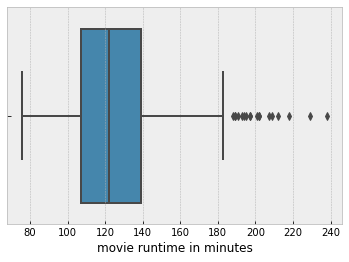

In [19]:
sns.boxplot(df.movie_runtime)
plt.xlabel('movie runtime in minutes');

**We can see most of the movies have a duration of 100-140 min.we can also see an outliers which has a duration of more than 180 min**

In [20]:
df[df.movie_runtime>210]

,movie_names,release_year,movie_runtime,movie_genre,movie_rating,movie_ranking,Movie_Director,Movie_Stars,metascore,votes,Gross_(in_lakh)
110,Once Upon a Time in America,1984,229,"Crime, Drama",8.3,123,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGov...",75.0,345395,416.822
290,Gone with the Wind,1939,238,"Drama, Romance, War",8.2,323,"Victor Fleming, George Cukor, Sam Wood","Clark Gable, Vivien Leigh, Thomas Mitchell, ...",97.0,311710,15566.578
346,Lawrence of Arabia,1962,218,"Adventure, Biography, Drama",8.3,386,David Lean,"Peter O'Toole, Alec Guinness, Anthony Quinn,...",100.0,289583,3511.647
452,Ben-Hur,1959,212,"Adventure, Drama, History",8.1,513,William Wyler,"Charlton Heston, Jack Hawkins, Stephen Boyd,...",90.0,236908,5852.745


## Which Director Directs Most Number Of Movies 

In [21]:
df['Movie_Director'].value_counts()

Steven Spielberg                             13
Alfred Hitchcock                              9
Martin Scorsese                               9
Quentin Tarantino                             8
Christopher Nolan                             8
                                             ..
Mark Herman                                   1
Jon Watts                                     1
John Lasseter,  Ash Brannon,  Lee Unkrich     1
Bradley Cooper                                1
Merian C. Cooper,  Ernest B. Schoedsack       1
Name: Movie_Director, Length: 324, dtype: int64

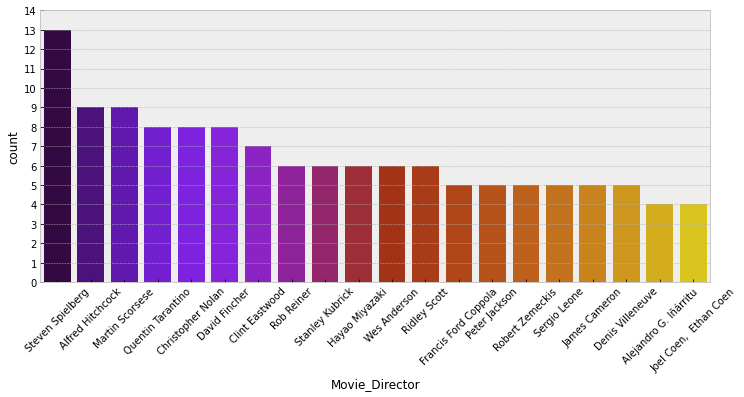

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(x='Movie_Director',data=df,order=df['Movie_Director'].value_counts().index[:20],palette="gnuplot")
plt.xticks(rotation=45)
plt.yticks(np.arange(0,15));

**Steven Spielberg is the director with the highest number of movies.He directed 13 movies from the given dataset his movie ratings ranges 7.6 to 9.0**

# Percentage of Genre (Piechart)

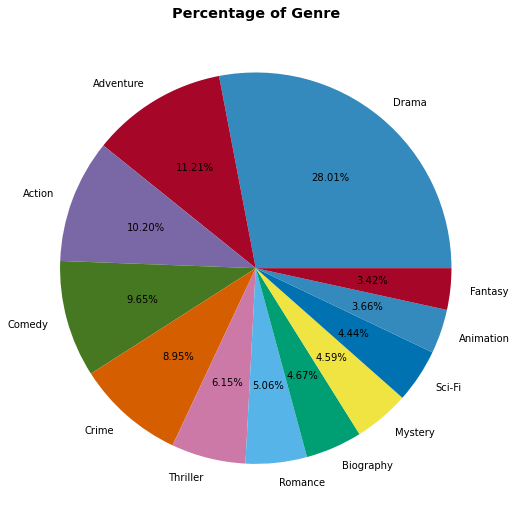

In [26]:
gen = []
for x in df.movie_genre:
    for y in x.split(','):
        gen.append(y.strip())


genre=((pd.Series(gen).value_counts()/len(gen) )*100).round(2).head(12)
plt.figure(figsize=(16,9))
plt.pie(x=genre.values,
        labels=genre.index,
        autopct='%.2f%%')
plt.title('Percentage of Genre',weight='bold');

**Drama movies have been most successful with overall 28.16 % in top 550 movie dataset**

# 2. BIVARIATE ANALYSIS

## movie_ratings vs Gross (numerical to numerical)

In [104]:
df.columns

Index(['movie_names', 'release_year', 'movie_runtime', 'movie_genre',
       'movie_rating', 'movie_ranking', 'Movie_Director', 'Movie_Stars',
       'metascore', 'votes', 'Gross_(in_lakh)'],
      dtype='object')

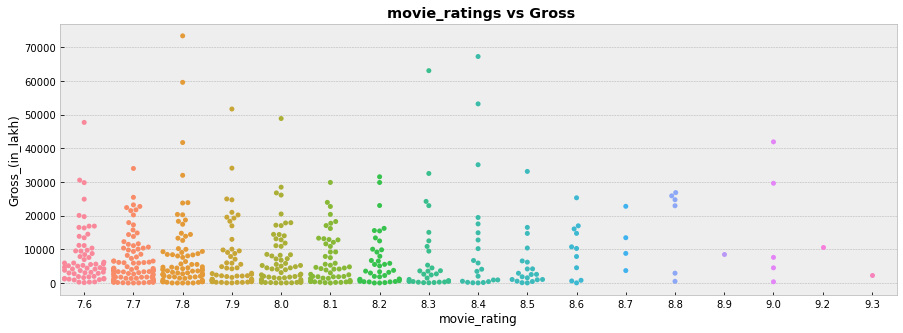

In [32]:
plt.figure(figsize=(15,5))
sns.swarmplot(df.movie_rating,df['Gross_(in_lakh)'])
plt.title(' movie_ratings vs Gross',weight='bold');

**Movies that have been well rated by public are movies that have generated the most of Profit**

## Director with highest number of votes (Categorical & Numerical)

In [106]:
top_10=df.nlargest(10,'votes')[['Movie_Director','votes','movie_rating','movie_genre']]
top_10

,Movie_Director,votes,movie_rating,movie_genre
7,Frank Darabont,2604787,9.3,Drama
19,Christopher Nolan,2576344,9.0,"Action, Crime, Drama"
20,Christopher Nolan,2285535,8.8,"Action, Adventure, Sci-Fi"
34,David Fincher,2051868,8.8,Drama
26,Robert Zemeckis,2012804,8.8,"Drama, Romance"
23,Quentin Tarantino,1996324,8.9,"Crime, Drama"
89,"Lana Wachowski, Lilly Wachowski",1869617,8.7,"Action, Sci-Fi"
40,Peter Jackson,1809579,8.8,"Action, Adventure, Drama"
0,Francis Ford Coppola,1800230,9.2,"Crime, Drama"
107,Peter Jackson,1788521,9.0,"Action, Adventure, Drama"


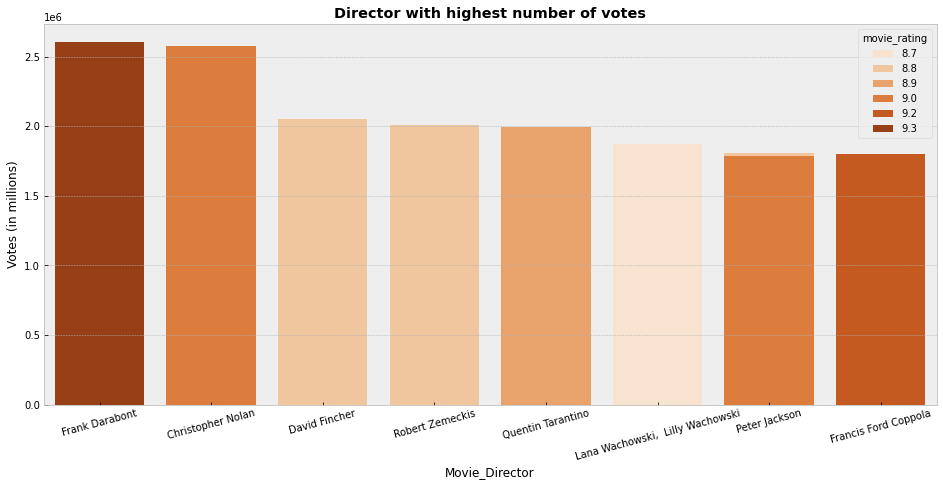

In [107]:
plt.figure(figsize=(16,7))
sns.barplot(y=top_10.votes,x='Movie_Director',data=top_10,ci=0,palette='Oranges',hue='movie_rating',dodge=False)
plt.title('Director with highest number of votes',weight='bold')
plt.xticks(rotation=15)
plt.ylabel('Votes (in millions)');

**"Frank Darabont and Christopher Nolan" is the Director with highest number votes with average ratings of 9.3 & 9.2** 

## Ratings vs Metascore

<AxesSubplot:xlabel='movie_rating', ylabel='metascore'>

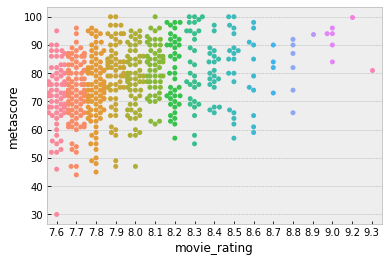

In [154]:
sns.swarmplot(x=df.movie_rating,y=df.metascore,data=df)

**The films that are well rated by the audience and the critics are the ones who brought in a lot of money**

In [125]:
df[df.movie_rating>=9.2]

,movie_names,release_year,movie_runtime,movie_genre,movie_rating,movie_ranking,Movie_Director,Movie_Stars,metascore,votes,Gross_(in_lakh)
0,The Godfather,1972,175,"Crime, Drama",9.2,4,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane...",100.0,1800230,10574.8995
7,The Shawshank Redemption,1994,142,Drama,9.3,12,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Wi...",81.0,2604787,2220.4390


## Top 7 movie  Stars  based on high ratings and Metascore

In [109]:
top_voted=df.sort_values(['movie_rating','metascore'],ascending=False)[:7]
top_voted

,movie_names,release_year,movie_runtime,movie_genre,movie_rating,movie_ranking,Movie_Director,Movie_Stars,metascore,votes,Gross_(in_lakh)
7,The Shawshank Redemption,1994,142,Drama,9.3,12,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Wi...",81.0,2604787,2220.4390
0,The Godfather,1972,175,"Crime, Drama",9.2,4,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane...",100.0,1800230,10574.8995
116,12 Angry Men,1957,96,"Crime, Drama",9.0,129,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, Jo...",96.0,769606,341.6060
53,Schindler's List,1993,195,"Biography, Drama, History",9.0,62,Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, C...",94.0,1324423,7592.1150
107,The Lord of the Rings: The Return of the King,2003,201,"Action, Adventure, Drama",9.0,120,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, ...",94.0,1788521,29604.5475
5,The Godfather Part II,1974,202,"Crime, Drama",9.0,10,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, D...",90.0,1239807,4489.4550
19,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,25,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,...",84.0,2576344,41906.2810


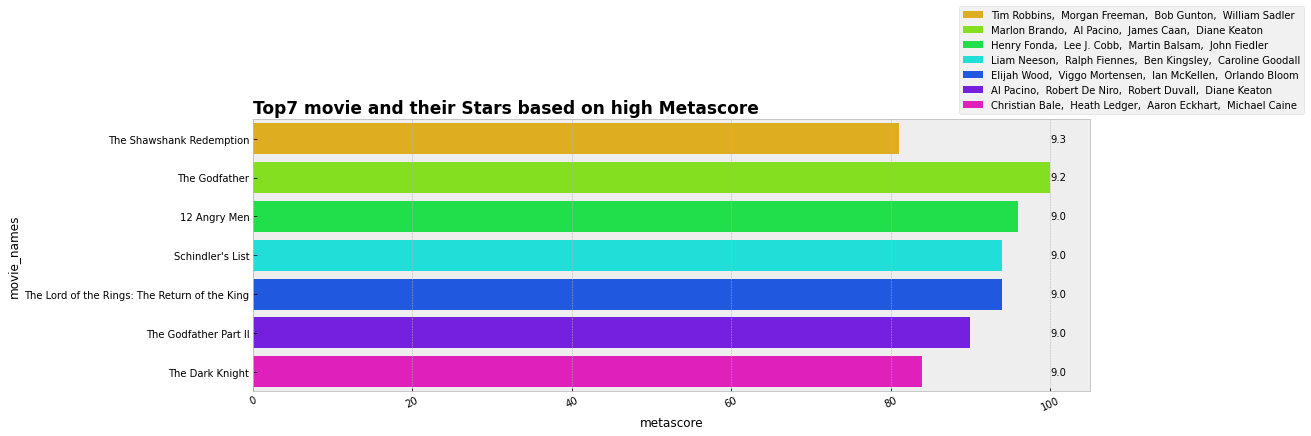

In [110]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,y=top_voted['movie_names'],x=top_voted['metascore'][:7],hue=top_voted['Movie_Stars'],palette = 'hsv',dodge=False)
plt.title('Top7 movie and their Stars based on high Metascore',weight='bold',fontsize=17,loc='left')
plt.legend(bbox_to_anchor=(1.05,1),loc=8)
plt.xticks(rotation=25)

counts = top_voted.movie_rating
for i,count in enumerate(counts):
    plt.text(100,i,count,va="center")
plt.show();

**"The Godfather" is the movie which is highly rated by critics with 100 metascore with 9.2 ratings rated by public whose stars are Marlon Brando, Al Pacino, James Caan, Diane Keaton**

##  Year with more Gross (Numerical & Numerical)

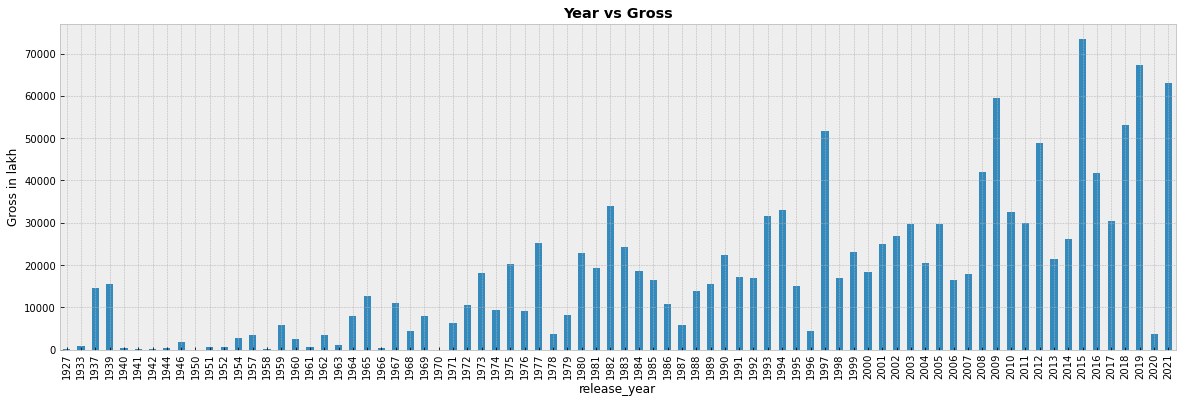

In [111]:
plt.figure(figsize=(20,6))
df.groupby(['release_year'])['Gross_(in_lakh)'].max().plot.bar()
plt.ylabel('Gross in lakh')
plt.title('Year vs Gross',weight='bold');

**2015 ,2019 , 2021 , 2009 was the year with highest Gross above 60000 lakhs**

## Top 10 movies with Highest Gross and their Director (Categorical & Numerical)

In [112]:
highest = df.sort_values(['Gross_(in_lakh)'],ascending=False)[:11]
highest.head(5)

,movie_names,release_year,movie_runtime,movie_genre,movie_rating,movie_ranking,Movie_Director,Movie_Stars,metascore,votes,Gross_(in_lakh)
72,Star Wars: Episode VII - The Force Awakens,2015,138,"Action, Adventure, Sci-Fi",7.8,82,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Dom...",80.0,914996,73387.3110
8,Avengers: Endgame,2019,181,"Action, Adventure, Drama",8.4,13,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo...",78.0,1069159,67253.2895
2,Spider-Man: No Way Home,2021,148,"Action, Adventure, Fantasy",8.3,6,Jon Watts,"Tom Holland, Zendaya, Benedict Cumberbatch, ...",71.0,667445,63052.1625
27,Avatar,2009,162,"Action, Adventure, Fantasy",7.8,35,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weav...",83.0,1209333,59585.9585
42,Avengers: Infinity War,2018,149,"Action, Adventure, Sci-Fi",8.4,51,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Hemsworth, Mark Ruf...",68.0,1028450,53185.5470


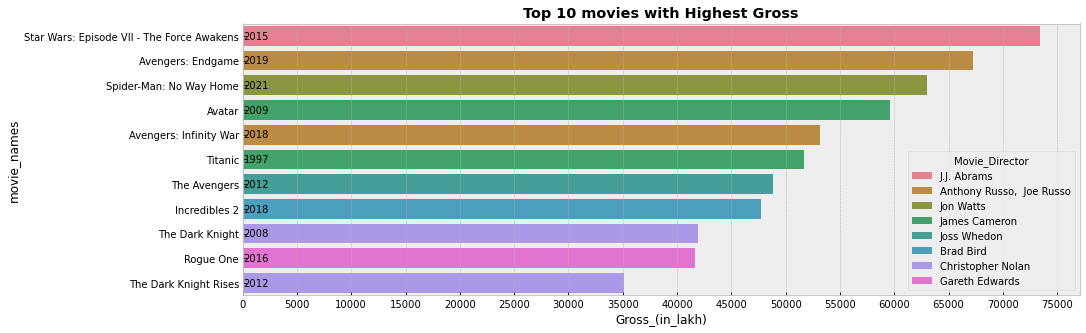

In [113]:
plt.figure(figsize=(15,5))
highest = df.sort_values(['Gross_(in_lakh)'],ascending=False)[:11]
sns.barplot(data=highest,y=highest.movie_names,x = highest['Gross_(in_lakh)'],hue='Movie_Director',palette = 'husl',dodge=False)
plt.title('Top 10 movies with Highest Gross',weight='bold')
plt.xticks(np.arange(0,80000,5000))


counts = highest.release_year
for i,count in enumerate(counts):
    plt.text(100,i,count,va="center")
plt.show();

**Star Wars: Episode VII - The Force Awakens is considered to be the  highest Box-Office collection of 73387.3 lakh ,directed by "J.J. Abrams which was released in 2015"**


## impact of Gross based on votes and metascore (Numerical & Numerical)

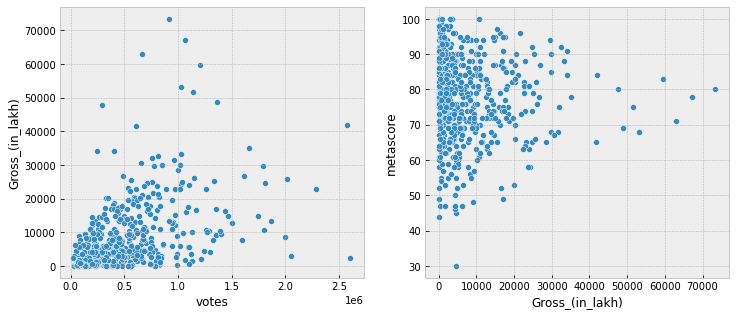

In [114]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df,x='votes',y='Gross_(in_lakh)')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df,x='Gross_(in_lakh)',y='metascore');

##  Average Runtime Lengths Per Genre (Categorical & numerical)

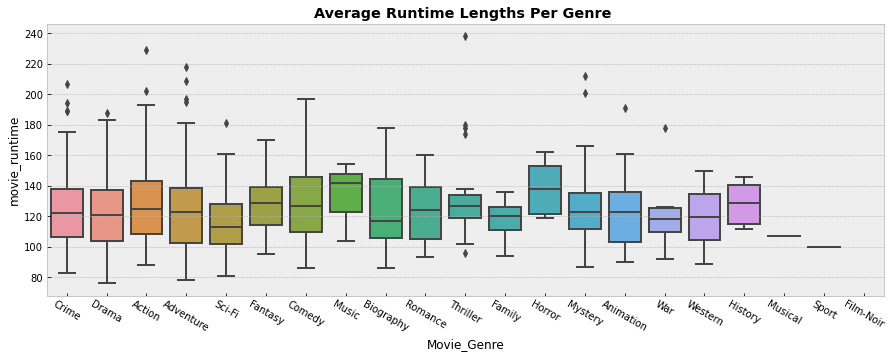

In [115]:
plt.figure(figsize=(15,5))
sns.boxplot(x=pd.Series(gen),y='movie_runtime',data=df);
plt.xticks(rotation=330);
plt.xlabel('Movie_Genre')
plt.title('Average Runtime Lengths Per Genre ',weight='bold');

**Action,Adventure,Comedy are the movies have longest average period of runtime**

# Multivariate Analysis

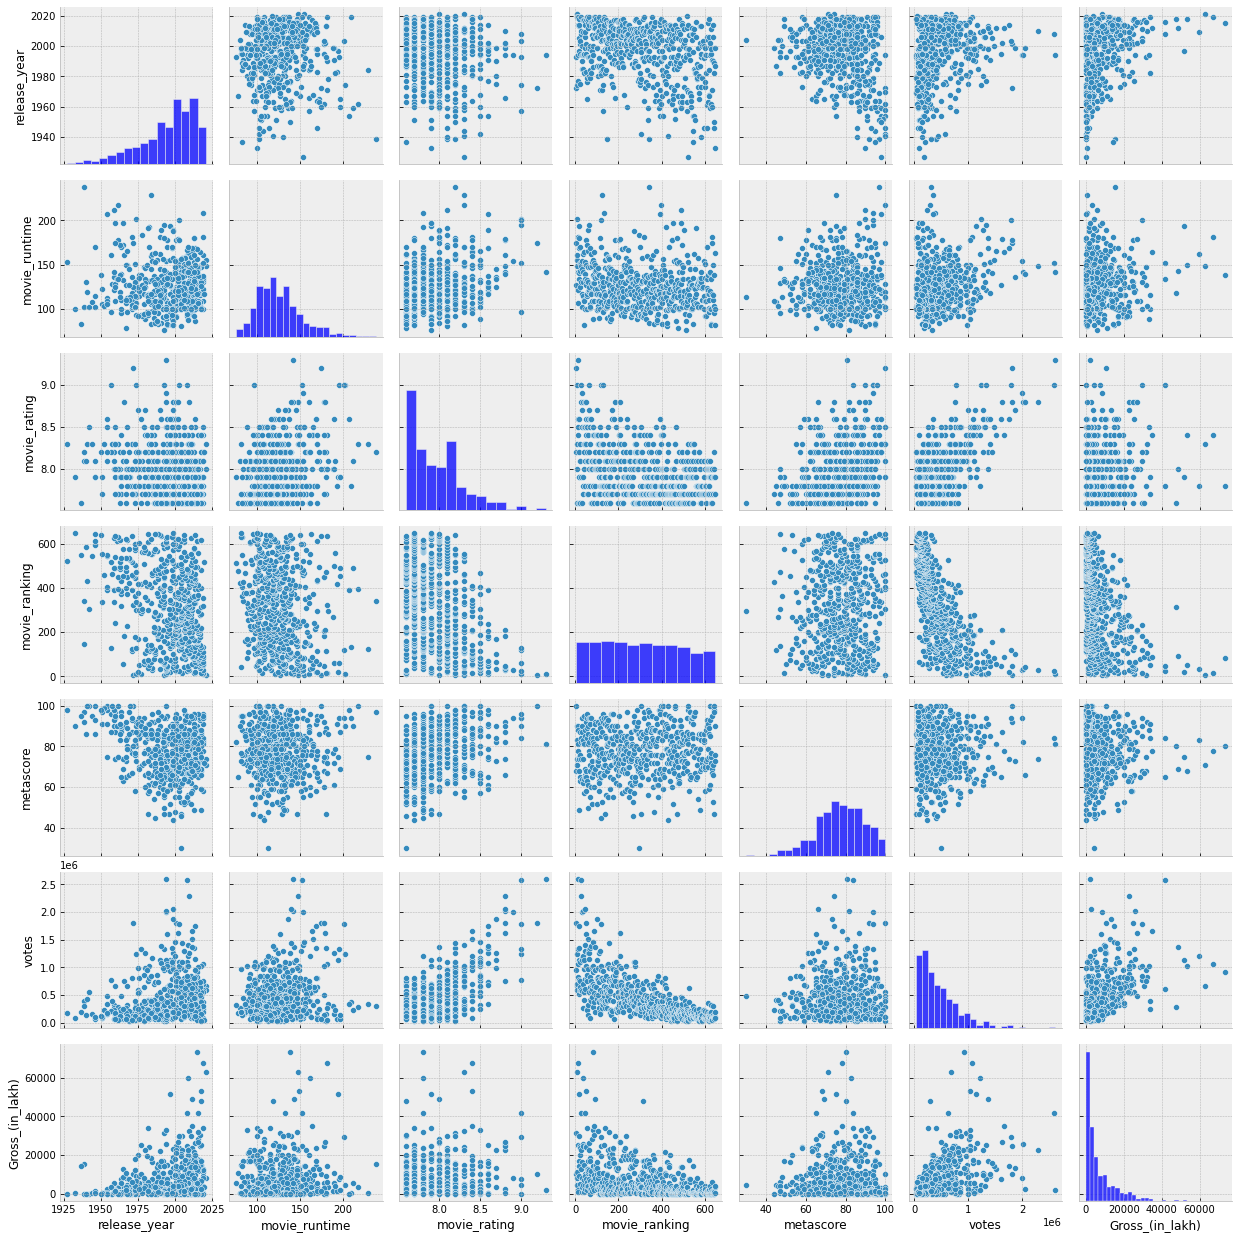

In [116]:
sns.pairplot(df);

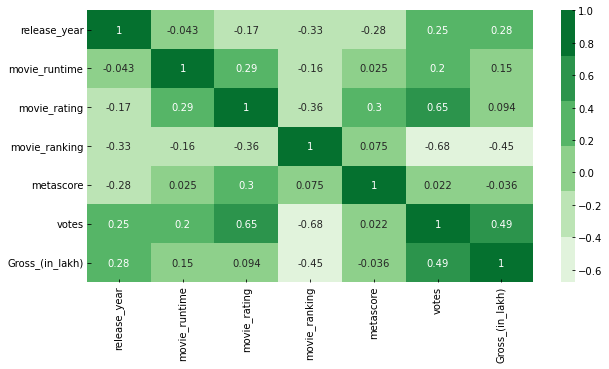

In [117]:
plt.figure(figsize=(10,5))
colormap = sns.color_palette("Greens")
sns.heatmap(df.corr(),annot=True, cmap=colormap);

**All negative value show that they are negatively correlated and positive values are positively correlated**

In [126]:
df.columns

Index(['movie_names', 'release_year', 'movie_runtime', 'movie_genre',
       'movie_rating', 'movie_ranking', 'Movie_Director', 'Movie_Stars',
       'metascore', 'votes', 'Gross_(in_lakh)'],
      dtype='object')

In [141]:
df.groupby(['movie_genre'])['movie_rating'].mean()

movie_genre
Action, Adventure             8.300000
Action, Adventure, Comedy     7.828571
Action, Adventure, Crime      7.600000
Action, Adventure, Drama      8.161538
Action, Adventure, Fantasy    8.200000
                                ...   
Horror, Thriller              7.766667
Mystery, Romance, Thriller    8.300000
Mystery, Sci-Fi, Thriller     8.000000
Mystery, Thriller             8.366667
Western                       8.125000
Name: movie_rating, Length: 154, dtype: float64